<img src="korelasyonanalizi.png">

In [47]:
import pandas as pd
import seaborn as sns

"""
    total_bill: yemeğin toplam fiyatı (bahşiş dahil)
    tip: bahşiş
    sex: ücreti odeyen kişinin cinsiyeti (0: male, 1: female)
    smoker: grupta sigara icen var mı
    day: gün
    time: ne zaman
    size: grupta kaç kişi var?
"""
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
df["total_bill"] -= df["tip"] # bütün masraflardan bahşiş çıkarılır

In [49]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


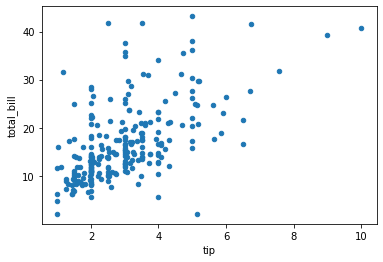

In [50]:
df.plot.scatter("tip", "total_bill")

In [51]:
# varsayim kontrolü
from scipy.stats import shapiro

test_istatistigi, pvalue = shapiro(df["tip"])
print("test istatistigi: {:.4f}, p-value: {:.4f}" .format(test_istatistigi, pvalue))
# H0 red

test_istatistigi, pvaue = shapiro(df["total_bill"])
print("test istatistigi: {:.4f}, p-value: {:.4f}" .format(test_istatistigi, pvalue))
# H0 red

test istatistigi: 0.8978, p-value: 0.0000
test istatistigi: 0.9136, p-value: 0.0000


In [52]:
""" hipotez testi """
# korelasyon katsayisi

df["tip"].corr(df["total_bill"])

0.5766634471096379

In [53]:
df["tip"].corr(df["total_bill"], method="spearman")

0.593691939408997

In [54]:
from scipy.stats.stats import pearsonr

korelasyon_katsayisi, pvalue = pearsonr(df["tip"], df["total_bill"])
print("Korelasyon katsayisi: {:.4f}, p-value: {:.4f}" .format(korelasyon_katsayisi, pvalue))
# H0 red

Korelasyon katsayisi: 0.5767, p-value: 0.0000


In [58]:
# nonparametrik korelasyon testi
from scipy import stats

print("p-value: {:.4f}".format(stats.spearmanr(df["tip"], df["total_bill"])[1]))
# H0 red

print("p-value: {:.4f}".format(stats.kendalltau(df["tip"], df["total_bill"])[1]))
# H0 red

p-value: 0.0000
p-value: 0.0000
